In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
app_train=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/application_train.csv')
bureau_balance=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/bureau_balance.csv')
bureau=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/bureau.csv')
credit_card_balance=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/credit_card_balance.csv')
#HomeCredit_columns_description=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/HomeCredit_columns_description.csv')
installments_payments=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/installments_payments.csv')
POS_CASH_balance=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/POS_CASH_balance.csv')
previous_application=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/previous_application.csv')
app_test=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/application_test.csv')

### Check some features, and see if they are significant

#### Statistical Analysis Checking

In [6]:
corr = app_train.corr()

**Pick one feature, AMT_REQ_CREDIT_BUREAU_YEAR to check if this feature is important.**
Hypothesis: H0:There is no significant relationship between AMT_REQ_CREDIT_BUREAU_YEAR and Target.H1:There is significant relationship betwwen AMT_REQ_CREDIT_BUREAU_YEAR and Target.

In [15]:
app_train[['TARGET','AMT_REQ_CREDIT_BUREAU_YEAR']].corr()

,TARGET,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.00000,0.01993
AMT_REQ_CREDIT_BUREAU_YEAR,0.01993,1.00000


In [16]:
app_train.shape

(307511, 122)

In [17]:
t=(0.01993*((307511-2)/(1-(0.01993)**2))**0.5)
import scipy.stats as stats
p_value1 = stats.t.sf(np.abs(t), (307511-2))*2 
print(p_value1)

2.120801309724195e-28


**P value is very low, so the feature is significant.**

#### Practical Analysis Checking
Compare two groups, target with 1 and 0, see if the AMT_REQ_CREDIT_BUREAU_YEAR are significant difference. In this test, using A/B test to compare these two groups.

In [36]:
group1=pd.concat([app_train[app_train.TARGET==1]]*10)
group0=app_train[app_train.TARGET==0]
group1['AMT_REQ_CREDIT_BUREAU_YEAR']=group1['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)
group0['AMT_REQ_CREDIT_BUREAU_YEAR']=group0['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

/Users/renfeigao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
import scipy.stats as ss
ss.ttest_ind(group1['AMT_REQ_CREDIT_BUREAU_YEAR'],group0['AMT_REQ_CREDIT_BUREAU_YEAR'])

Ttest_indResult(statistic=7.2641440175890315, pvalue=3.7591888964470287e-13)

**There is a significant difference for AMT_REQ_CREDIT_BUREAU_YEAR between the default and non default groups**

### Plot to see the difference

/Users/renfeigao/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


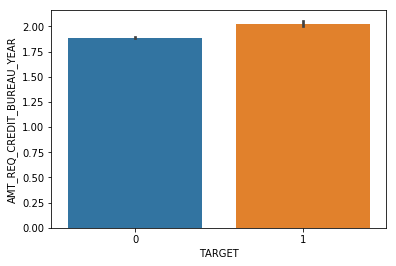

In [44]:
sns.barplot(data=app_train,x='TARGET',y='AMT_REQ_CREDIT_BUREAU_YEAR')

**From the chart. There is actually a big difference for AMT_REQ_CREDIT_BUREAU_YEAR between the default and non default groups. So this is a significant feature**